# K-Nearst Neighbors Model

In [1750]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [1751]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [1752]:
df.dropna(inplace=True)

### One Hot Encoding

In [1753]:
# def one_hot_encode(data, column):
#  encoded = pd.get_dummies(data[column], drop_first= True)
#  data = data.drop(column, axis = 1)
#  data = data.join(encoded)
#  return data

In [1754]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [1755]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth', 'NumDealsPurchases','BuyingPower','Age']]

data['Marital_Status'].unique()

array(['Single', 'Couple'], dtype=object)

In [1756]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [1757]:
X = data.drop('Response', axis=1).iloc[:,1:]
X.head()

,Total_Children,Recency,TotalPurchases,Complain,NumWebVisitsMonth,NumDealsPurchases,BuyingPower,Age,Education_Graduation,Education_Master,Education_PhD,Education_n_cycle,Marital_Status_Single
0,0,65,15,0,20,15,0.000771,53,1.0,0.0,0.0,0.0,1.0
1,1,56,0,0,14,0,0.000238,51,1.0,0.0,0.0,0.0,1.0
2,2,29,15,0,19,15,0.000373,61,0.0,0.0,1.0,0.0,0.0
3,1,0,25,0,1,0,0.013512,55,1.0,0.0,0.0,0.0,0.0
4,0,20,0,0,14,0,0.000206,59,1.0,0.0,0.0,0.0,1.0


In [1758]:
y = df['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling

In [1759]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# K-Nearest

In [1760]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [1761]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [1762]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8371
Precision: 0.4308
Recall: 0.2828
F1: 0.3415
AUC: 0.6086


# Figures

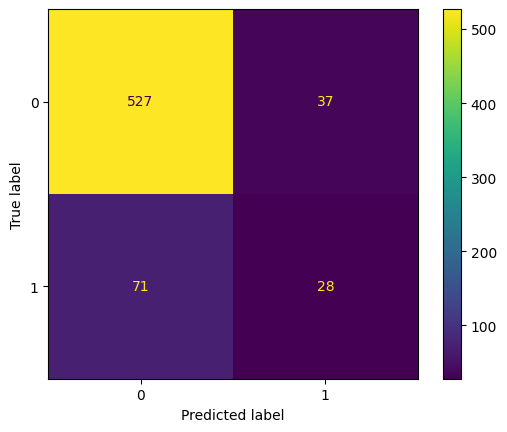

In [1763]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)

cm_display.plot()
plt.show()

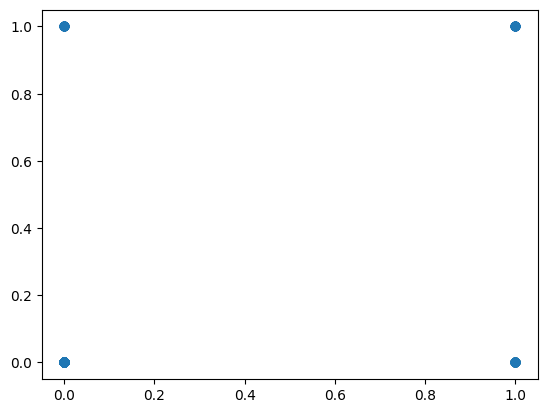

In [1764]:
plt.scatter(y_test, preds)